#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


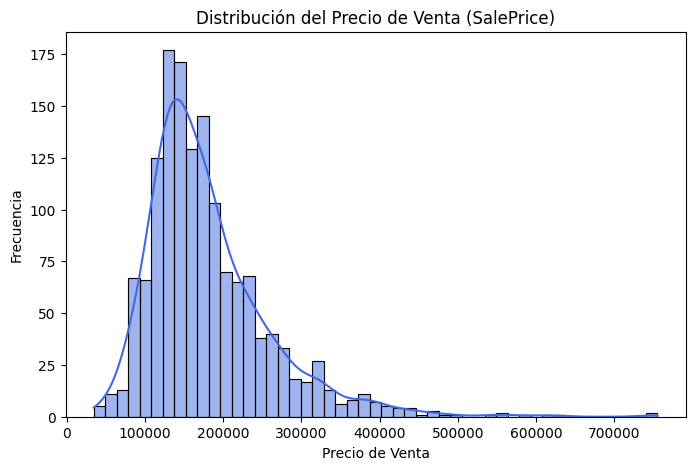

El gráfico muestra una distribución sesgada hacia la derecha
lo que indica que la mayoría de las casas se venden a precios medios o bajos
mientras que unas pocas alcanzan valores muy altos.
 Dimensiones combinadas: (2919, 82)


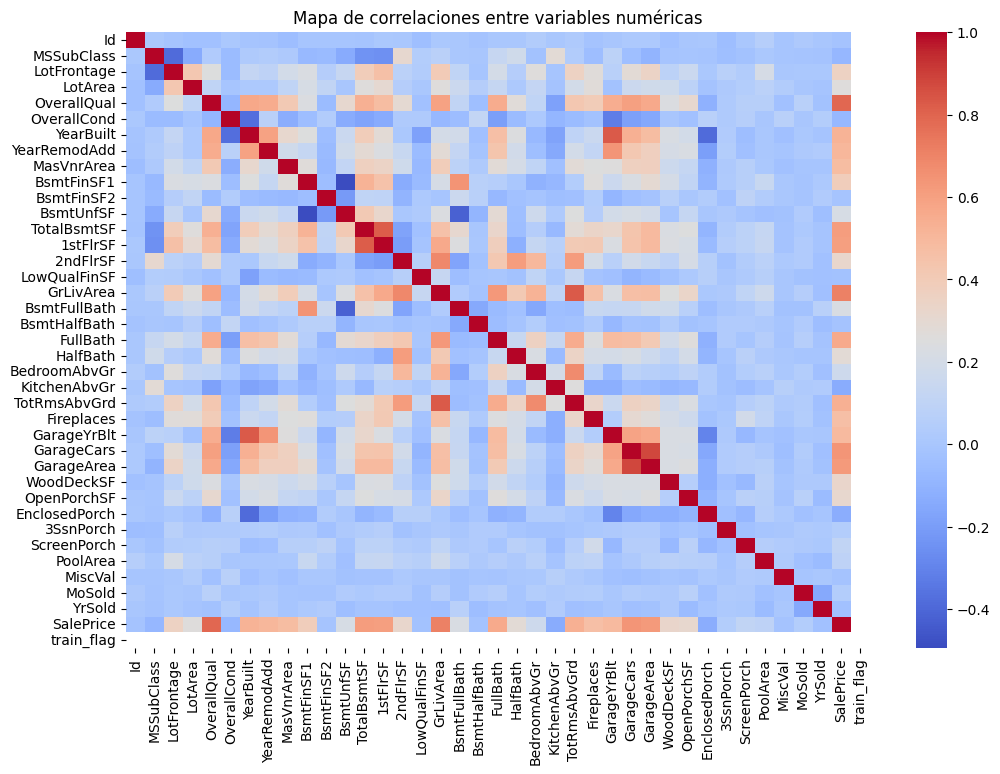

El mapa de calor permite visualizar la relación lineal entre las variables 
numéricas. Se observan correlaciones altas en variables estructurales (por ejemplo, 
'GrLivArea', 'TotalBsmtSF', 'GarageArea') que tienden a influir en el precio de venta.


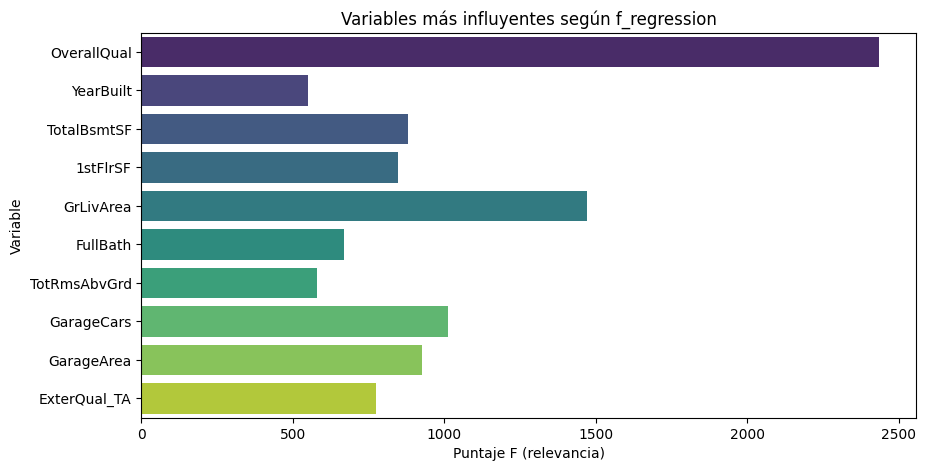

Las variables con mayor puntaje F son las que presentan mayor capacidad explicativa 
sobre el precio de venta. Destacan 'OverallQual', 'GrLivArea' y 'TotalBsmtSF'
 lo cual coincide con características estructurales clave de las viviendas.


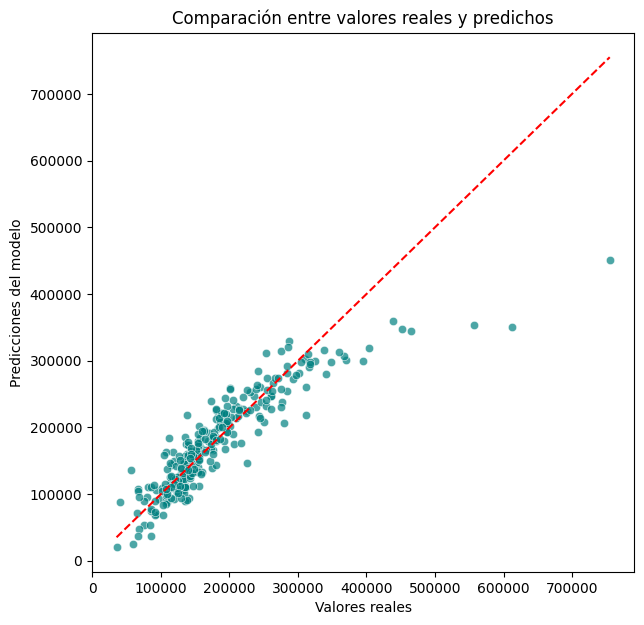

Los puntos cercanos a la línea roja indican buenas predicciones del modelo 
Se aprecia una relación positiva, aunque con cierta dispersión en los precios más altos 
lo que sugiere menor precisión en viviendas de mayor valor.


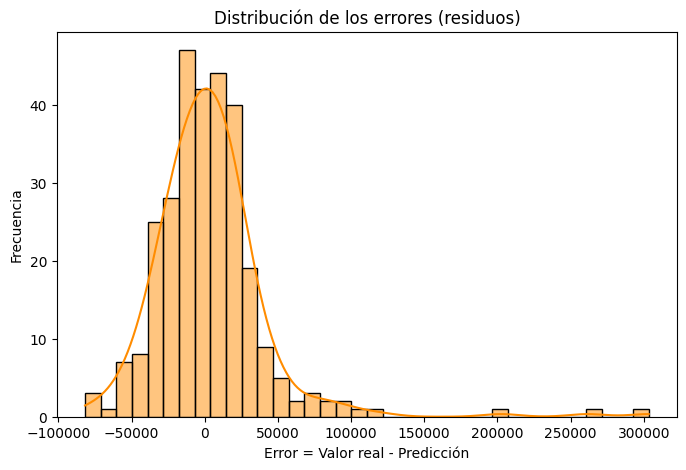

Los residuos están centrados cerca de cero, lo que indica que el modelo no presenta sesgo sistemático. 
Sin embargo, la ligera asimetría sugiere que el modelo tiende a subestimar algunos precios elevados.

RESULTADOS DEL MODELO LINEAL MULTIPLE
   MSE:  1570711805.66
   RMSE: 39632.21
   MAE:  24889.11
   R²:   0.7952

archivo 'predicciones.csv' generado con éxito.


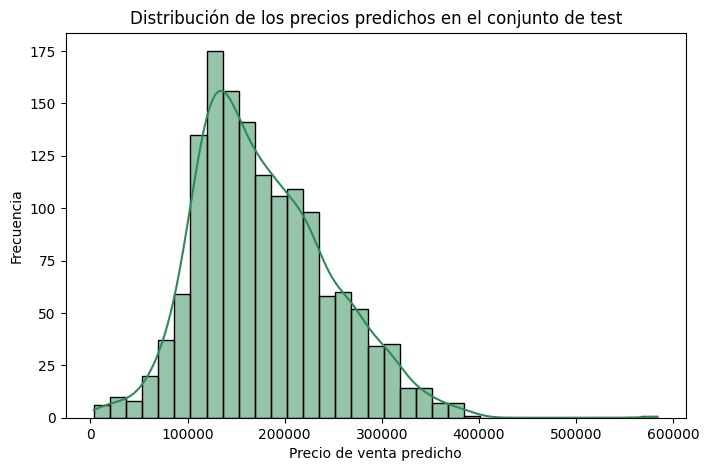

La distribución de precios predichos mantiene una forma similar a la real, lo que indica 
que el modelo aprendió correctamente el patrón general del mercado, aunque con menor dispersión 
en los valores extremos.


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# datos 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train["SalePrice"], kde=True, color="royalblue")
plt.title("Distribución del Precio de Venta (SalePrice)")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

print("El gráfico muestra una distribución sesgada hacia la derecha") 
print("lo que indica que la mayoría de las casas se venden a precios medios o bajos") 
print("mientras que unas pocas alcanzan valores muy altos.")

# combinar
train["train_flag"] = 1
test["train_flag"] = 0
df = pd.concat([train, test], ignore_index=True)
print(f" Dimensiones combinadas: {df.shape}")

# limpieza de datos 
# imputar valores faltantes numericos con la media
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

plt.figure(figsize=(12,8))
sns.heatmap(train.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

print("El mapa de calor permite visualizar la relación lineal entre las variables ") 
print("numéricas. Se observan correlaciones altas en variables estructurales (por ejemplo, ") 
print("'GrLivArea', 'TotalBsmtSF', 'GarageArea') que tienden a influir en el precio de venta.")

# inputar categoricos con la moda
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# codificacion eliminar primera columna para evitar multicolinealidad)
df = pd.get_dummies(df, drop_first=True)

# separar nuevamente train y test ===
train_df = df[df["train_flag"] == 1].drop("train_flag", axis=1)
test_df = df[df["train_flag"] == 0].drop(["train_flag", "SalePrice"], axis=1)

# definir variables predictoras y objetivo 
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# seleccion de variables las 10 más relevantes
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

scores = selector.scores_[selector.get_support()]
plt.figure(figsize=(10,5))
sns.barplot(x=scores, y=selected_features, hue=selected_features, palette="viridis", legend=False)
plt.title("Variables más influyentes según f_regression")
plt.xlabel("Puntaje F (relevancia)")
plt.ylabel("Variable")
plt.show()

print("Las variables con mayor puntaje F son las que presentan mayor capacidad explicativa ") 
print("sobre el precio de venta. Destacan 'OverallQual', 'GrLivArea' y 'TotalBsmtSF'" )
print(" lo cual coincide con características estructurales clave de las viviendas.")

# division de datos 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42
)

# escalado 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modelo
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# resultado
y_pred = modelo.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones del modelo")
plt.title("Comparación entre valores reales y predichos")
plt.show()

print("Los puntos cercanos a la línea roja indican buenas predicciones del modelo ") 
print("Se aprecia una relación positiva, aunque con cierta dispersión en los precios más altos ") 
print("lo que sugiere menor precisión en viviendas de mayor valor.")

residuos = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, color="darkorange")
plt.title("Distribución de los errores (residuos)")
plt.xlabel("Error = Valor real - Predicción")
plt.ylabel("Frecuencia")
plt.show()

print("Los residuos están centrados cerca de cero, lo que indica que el modelo no presenta sesgo sistemático. " )
print("Sin embargo, la ligera asimetría sugiere que el modelo tiende a subestimar algunos precios elevados.")

print("\nRESULTADOS DEL MODELO LINEAL MULTIPLE")
print(f"   MSE:  {mse:.2f}")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE:  {mae:.2f}")
print(f"   R²:   {r2:.4f}")

# prediccion
test_scaled = scaler.transform(test_df[selected_features])
predicciones = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": modelo.predict(test_scaled)
})
predicciones.to_csv("predicciones.csv", index=False)
print("\narchivo 'predicciones.csv' generado con éxito.")

plt.figure(figsize=(8,5))
sns.histplot(predicciones["SalePrice"], kde=True, color="seagreen")
plt.title("Distribución de los precios predichos en el conjunto de test")
plt.xlabel("Precio de venta predicho")
plt.ylabel("Frecuencia")
plt.show()

print("La distribución de precios predichos mantiene una forma similar a la real, lo que indica " )
print("que el modelo aprendió correctamente el patrón general del mercado, aunque con menor dispersión " )
print("en los valores extremos.")